In [2]:
import pandas as pd
import numpy as np
import recmetrics

In [3]:
rating =  pd.read_csv('D:/recommender system/rating_1000.csv',sep = ',',error_bad_lines=False)
item_matrix =  pd.read_csv('D:/recommender system/item_matrix.csv',sep = ';',error_bad_lines=False)

In [ ]:
#select films in rating that are in item_matrix
keepvalues = pd.unique(item_matrix['movieId'])
rating = rating.loc[rating['movieId'].isin(keepvalues)]
rating = pd.pivot_table(rating,values='rating',index='userId',columns='movieId')

# Comptage occurences genres

In [ ]:
genre =  pd.read_csv('D:/recommender system/genre_matrix.csv',sep = ';',error_bad_lines=False)
genre = genre.loc[genre['movieId'].isin(keepvalues)]
genre = genre.set_index('movieId')

In [20]:
a=0
c = np.zeros( (len(list(rating.index.values)), len(rating.columns.values)) )
for l in list(rating.index.values):
    m=0
    for j in list(rating.columns.values):
        n= 0
        item = []
        item.append(j)
        for i in list(rating.columns.values):
            if (not(pd.isna(rating.loc[l,i]))):
                n = n+1
                item.append(i)

        genre2=genre.loc[item]
        genres = []
        for k in list(genre.columns.values):
            if (genre.loc[j,k]==1):
                genres.append(k)
        item.remove(j)
        genre2=genre.loc[item][genres]
        c[a,m] = genre2.values.sum()
        m=m+1
    a=a+1

In [ ]:
df = pd.DataFrame(data=c)

In [17]:
df.to_csv('D:/recommender system/occurence_genre.csv',index=False)

In [4]:
genre = pd.read_csv('D:/recommender system/occurence_genre.csv')

In [10]:
df=df.set_index(rating.index.values)
rating=rating.iloc[index]
df= df.iloc[index]

#  Comptages occurence directors

In [9]:
directors = pd.read_csv('D:/recommender system/directors.csv',sep = ';',error_bad_lines=False)

In [10]:
directors['tconst']=directors['tconst'].str.replace('tt', '').astype(float)

In [11]:
directors = directors.drop(['writers'],axis=1)

In [12]:
item_matrix = item_matrix.merge(directors, left_on='imdb', right_on='tconst')

In [13]:
item_matrix = item_matrix.drop(['tconst'] , axis = 1)

In [15]:
item_matrix.to_csv('D:/recommender system/item_matrix.csv',index=False)

In [50]:
a=0
c = np.zeros( (len(list(rating.index.values)), len(rating.columns.values)) )
for l in list(rating.index.values):
    m=0
    for j in list(rating.columns.values):
        b=item_matrix.loc[m,'directors']
        n= 0
        item = []
        item.append(j)
        for i in list(rating.columns.values):
            if (not(pd.isna(rating.loc[l,i]))):
                n = n+1
                item.append(i)
        matrix=item_matrix.loc[item_matrix['movieId'].isin(item)]
        director=len(matrix.loc[matrix['directors']==b])
        c[a,m]=director
        m=m+1
    a=a+1

In [53]:
pd.DataFrame(c).to_csv('D:/recommender system/occurence_directors.csv',index=False)

In [5]:
director=pd.read_csv('D:/recommender system/occurence_directors.csv')

#  Comptage occurence pays

In [57]:
pd.DataFrame(c).to_csv('D:/recommender system/occurence_country.csv',index=False)

In [ ]:
a=0
c = np.zeros( (len(list(rating.index.values)), len(rating.columns.values)) )
for l in list(rating.index.values):
    m=0
    for j in list(rating.columns.values):
        b=item_matrix.loc[m,'country']
        n= 0
        item = []
        item.append(j)
        for i in list(rating.columns.values):
            if (not(pd.isna(rating.loc[l,i]))):
                n = n+1
                item.append(i)
        matrix=item_matrix.loc[item_matrix['movieId'].isin(item)]
        country=len(matrix.loc[matrix['country']==b])
        c[a,m]=country
        m=m+1
    a=a+1

In [6]:
country=pd.read_csv('D:/recommender system/occurence_directors.csv')

# Actors

In [61]:
a=0
c = np.zeros( (len(list(rating.index.values)), len(rating.columns.values)) )
for l in list(rating.index.values):
    m=0
    for j in list(rating.columns.values):
        actor1=item_matrix.loc[m,'Actor 1']
        actor2=item_matrix.loc[m,'Actor 2']
        actor3=item_matrix.loc[m,'Actor 3']
        list_actor = [actor1,actor2,actor3]
        n= 0
        item = []
        item.append(j)
        for i in list(rating.columns.values):
            if (not(pd.isna(rating.loc[l,i]))):
                n = n+1
                item.append(i)
        matrix=item_matrix.loc[item_matrix['movieId'].isin(item)]
        actor=len(matrix.loc[matrix['Actor 1'].isin(list_actor) | matrix['Actor 2'].isin(list_actor) | matrix['Actor 3'].isin(list_actor)])
        c[a,m]=actor
        m=m+1
    a=a+1

In [63]:
pd.DataFrame(c).to_csv('D:/recommender system/occurence_actors.csv',index=False)

In [7]:
actors=pd.read_csv('D:/recommender system/occurence_actors.csv')

# Emotion

In [349]:
sentiment = item_matrix.iloc[:,7:34]
columns = list(sentiment.columns)

In [334]:
sentiment['Pos-Neg']=(sentiment['Pos-Neg']).replace(',', '.', regex=True).astype(float)

In [335]:
from sklearn.preprocessing import MinMaxScaler
sentiment = pd.DataFrame(MinMaxScaler(feature_range=(0,100)).fit_transform(sentiment))
sentiment.columns = columns

In [337]:
for i in columns : 
    sentiment.loc[sentiment[i] < 50,i ] = 0
    sentiment.loc[sentiment[i] >= 50,i] = 1

In [338]:
for i in columns : 
    sentiment[i] = sentiment[i].astype('int')

In [340]:
sentiment.to_csv('D:/recommender system/sentiment_seuil_50.csv')

In [341]:
sentiment.index=item.index

In [343]:
a=0
c = np.zeros( (len(list(rating.index.values)), len(rating.columns.values)) )
for l in list(rating.index.values):
    m=0
    for j in list(rating.columns.values):
        n= 0
        objets = []
        objets.append(j)
        for i in list(rating.columns.values):
            if (not(pd.isna(rating.loc[l,i]))):
                n = n+1
                objets.append(i)
        objets = list(map(int, objets))
        sentiment2=sentiment.loc[objets]
        sentiments = []
        for k in list(sentiment.columns.values):
            if (sentiment.loc[int(j),k]==1):
                sentiments.append(k)
        objets.remove(int(j))
        sentiment2=sentiment.loc[objets][sentiments]
        c[a,m] = sentiment2.values.sum()
        m=m+1
    a=a+1

In [161]:
pd.DataFrame(c).to_csv('D:/recommender system/occurence_sentiment_seuil_70.csv',index=False)

In [286]:
sentiment = pd.read_csv('D:/recommender system/occurence_sentiment_seuil_50.csv')

# Emotion des users

In [11]:
weight_emotion =  pd.read_csv('D:/recommender system/weight_emotion_dim2.csv',sep = ',',error_bad_lines=False)
weight_genre =  pd.read_csv('D:/recommender system/weight_genre_dim2.csv',sep = ',',error_bad_lines=False)
weight_emotion=weight_emotion.set_index(weight_emotion.iloc[:,0])
weight_genre=weight_genre.set_index(weight_genre.iloc[:,0])
weight_emotion = weight_emotion.iloc[:,1]
weight_genre = weight_genre.iloc[:,1]

In [16]:
r=item_matrix.iloc[:,np.r_[16:36,38]]
#r['Pos-Neg']=(r['Pos-Neg']).replace(',', '.', regex=True).astype(float)
r['Ero']=(r['Ero']).replace(',', '.', regex=True).astype(float)
r['AFINN(-4&-5)']=(r['AFINN(-4&-5)']).replace(',', '.', regex=True).astype(float)

r.iloc[:,0:20] = MinMaxScaler(feature_range=(0,100)).fit_transform(r.iloc[:,0:20])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [19]:
emotion=np.zeros( (len(list(rating.index.values)),len(list(rating.columns.values))))
k=0
l=0
for i in list(rating.index.values):
    l=0
    for j in list(rating.columns.values):
        item1=[]
        for m in list(rating.columns.values):
            if (not(pd.isna(rating.loc[i,m]))):
                item1.append(m)
        if (j in item1):
            item1.remove(j)
        temp=np.array(r[r['movieId'].isin(item1)].mean(axis=0))        
        emotion[k,l]= sum(temp[0:20]*np.array(weight_emotion))
        l=l+1   
    k=k+1

In [71]:
pd.DataFrame(emotion).to_csv('D:/recommender system/normalize_emotion_2.csv',index=False)

In [141]:
emotion_not_normalize =  pd.read_csv('D:/recommender system/not_normalize_emotion.csv',sep = ',',error_bad_lines=False)
emotion = pd.read_csv('D:/recommender system/normalize_emotion.csv',sep = ',',error_bad_lines=False)
emotion=emotion.set_index(rating.index.values)

# Weight

In [366]:
weight = pd.read_csv('D:/recommender system/weight_seuil_30.csv')

In [367]:
weight_genre = sum(weight.iloc[27:44,1])/100

In [368]:
weight_actor = sum(weight.iloc[44:47,1])/100

In [369]:
weight_director = weight.iloc[47,1]/100

In [370]:
weight_country = weight.iloc[48,1]/100

In [371]:
weight_sentiment = sum(weight.iloc[0:27,1])/100

In [372]:
weight_genre+weight_actor+weight_director+weight_country+weight_sentiment

0.999999999999999

In [157]:
weight = pd.read_csv('D:/recommender system/weight.csv')

In [158]:
weight_genre = sum(weight.iloc[0:17,1])
weight_actor = sum(weight.iloc[17:20,1])
weight_director = weight.iloc[20,1]
weight_country = weight.iloc[21,1]

In [375]:
genre = pd.read_csv('D:/recommender system/occurence_genre.csv')
sentiment = pd.read_csv('D:/recommender system/occurence_sentiment_seuil_30.csv',sep=';')
actors=pd.read_csv('D:/recommender system/occurence_actors.csv')
director=pd.read_csv('D:/recommender system/occurence_directors.csv')
country=pd.read_csv('D:/recommender system/occurence_directors.csv')

# Semantic rating

In [374]:
mean = rating.mean(axis=1)
full = rating.fillna(0)
#number of rated items
N = 112-rating.isnull().sum(axis=1)

In [6]:
index=np.sort(np.argpartition(N, len(N) - 1000)[-1000:])

In [343]:
semantic = full

In [376]:
semantic = pd.DataFrame(np.array(full) + np.array( mean[:, None] * (weight_genre*genre  +  weight_actor*np.array(actors)  +  weight_director*np.array(director)  +  weight_country*np.array(country) + weight_sentiment*np.array(sentiment)) / N[:,None]))

In [377]:
max = semantic.max().max()
min = semantic.min().min()
semantic.index.name='userId'
semantic.columns.name='movieId'
semantic=semantic.stack().reset_index(name='rating')
rating2=full.stack().reset_index(name='rating')
semantic['movieId']=rating2.iloc[:,1]

In [327]:
cols = semantic.columns.tolist()

In [224]:
cols = cols[-1:] + cols[:-1]

In [378]:
cols
#'userID', 'itemID', 'rating'


['userId', 'movieId', 'rating']

In [379]:
semantic=semantic[cols]

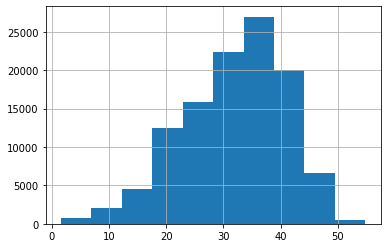

In [380]:
semantic['rating'].hist()

# Modelling

In [381]:
from surprise.model_selection import train_test_split
from surprise import Dataset
from surprise import Reader
reader=Reader(rating_scale=(0,max))
data=Dataset.load_from_df(semantic,reader)

In [382]:
item_matrix = item_matrix.sort_values(by=['movieId'])
item = item_matrix.set_index('movieId')
item_sentiment = pd.read_csv('D:/recommender system/sentiment_seuil_30.csv')
item_sentiment.iloc[:,0] = item.index
item = item.iloc[:,43:65]
item = item.merge(item_sentiment, left_on='movieId', right_on='Unnamed: 0', suffixes=(False, False))
item = item.set_index('Unnamed: 0')

In [383]:
# Label Encoding 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
item['country'] = le.fit_transform(item.country.values)
item['directors'] = le.fit_transform(item.directors.values)
stacked = item[['Actor 1', 'Actor 2', 'Actor 3']].stack().astype('category')
item[['Actor 1', 'Actor 2', 'Actor 3']] = stacked.cat.codes.unstack()

In [386]:
from surprise import SVD
from surprise import accuracy
from recmetrics import intra_list_similarity
split = [0.1,0.2,0.3,0.4]
rsme = []
precision = []
recall = []
F1 = []
F2 = []
intra_sentiment = []
intra_genre = []
intra_actor = []
for i in split :
    trainset, testset = train_test_split(data, test_size=i,random_state=42)
    algo = SVD()
    algo.fit(trainset)
    predictions = algo.test(testset)
    rsme.append(accuracy.rmse(predictions, verbose=True))
    #predictions = change_semantic(predictions)
    predictions = change_prediction(predictions,rating)
    precisions, recalls = precision_recall_at_k(predictions, k=20, threshold=4)
    p=sum(prec for prec in precisions.values()) / len(precisions)
    precision.append(p)
    r=sum(rec for rec in recalls.values()) / len(recalls)
    recall.append(r)
    F1.append(2*(p*r)/(p+r))
    F2.append(5*(p*r)/(4*p+r))
    pred = []
    top_n = get_top_n(predictions, n=10)
    for uid, user_ratings in top_n.items():
        pred.append([iid for (iid, _) in user_ratings])
    pred = [[int(num) for num in sub] for sub in pred]
    intra_sentiment.append(intra_list_similarity(pred,item.iloc[:,0:17]))
    intra_genre.append(intra_list_similarity(pred,item.iloc[:,18:20]))
    intra_actor.append(intra_list_similarity(pred,item.iloc[:,22:49]))

RMSE: 1.3525


C:\ProgramData\Anaconda3\lib\site-packages\scipy\sparse\base.py:582: RuntimeWarning: divide by zero encountered in true_divide
  return self.astype(np.float_)._mul_scalar(1./other)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\sparse\base.py:582: RuntimeWarning: divide by zero encountered in true_divide
  return self.astype(np.float_)._mul_scalar(1./other)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\sparse\base.py:582: RuntimeWarning: divide by zero encountered in true_divide
  return self.astype(np.float_)._mul_scalar(1./other)


RMSE: 1.3628
RMSE: 1.3860
RMSE: 1.4104


In [387]:
precision

[0.5457056002004533,
 0.5556796867863818,
 0.5877763157894735,
 0.5819499999999995]

In [388]:
recall

[0.9841749999999999, 0.8935858558713936, 0.660653070028182, 0.488123304305183]

In [389]:
F1

[0.7021068297838554,
 0.6852402046304773,
 0.6220876117263824,
 0.5309231728285163]

In [305]:
F2

[0.7051605876187597,
 0.5785852580374548,
 0.42307121560085814,
 0.32580765559032543]

In [338]:
intra_sentiment

[0.32710351611909616,
 0.3775687045221933,
 0.39134240348699395,
 0.4033022319444353]

In [339]:
intra_genre

[0.9026285724825408,
 0.8861510320435756,
 0.8922562689275834,
 0.9061427547546446]

In [340]:
intra_actor

[0.7477699405390672,
 0.8641468963795007,
 0.9012763302658409,
 0.9182524788164927]

In [135]:
def change_prediction(predictions,rating) :

    votes = []
    for i in range (len(predictions)):
        votes.append(predictions[i][0:3])
    a=pd.DataFrame.from_records( votes, columns =['userId', 'movieId', 'rating'])
    a['movieId']=pd.to_numeric(a['movieId'])
    df=pd.pivot_table(a,values='rating',index='userId',columns='movieId')
    for i in range(len(rating.index)):
        for j in range(len(rating.columns)):
            if pd.notnull(df.iloc[i,j]) :
                if pd.isna(rating.iloc[i,j]):
                    df.iloc[i,j] = 0
                else : 
                    df.iloc[i,j] = rating.iloc[i,j]

    tuples = [tuple(x) for x in df.stack().reset_index(name='rating').values]


    from collections import namedtuple
    class_name = 'Prediction'
    fields = 'uid iid r_ui est details'
    pred = namedtuple(class_name, fields)

    b=[]
    for index, item in enumerate(predictions):
        c = pred(item[0],int(item[1]),item[2],item[3],item[4])
        b.append(c)
    b=sorted(b, key=lambda element: (element[0], element[1]))

    d=[]
    for item1,item2 in zip(tuples,b):
        c=pred(item2[0],item2[1],item1[2],item2[3],item2[4])
        d.append(c)

    return d

In [385]:
from collections import defaultdict

def precision_recall_at_k(predictions, k=20, threshold=4):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

In [384]:
def get_top_n(predictions, n=20):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [162]:
def change_semantic (predictions):
    votes = []
    for i in range (len(predictions)):
        votes.append([predictions[i][k] for k in [0,1,3]])
    a=pd.DataFrame.from_records( votes, columns =['userId', 'movieId', 'rating'])
    a['movieId']=pd.to_numeric(a['movieId'])
    df=pd.pivot_table(a,values='rating',index='userId',columns='movieId')
    df=pd.DataFrame(np.array(df) + np.array( mean[:, None] * (weight_genre*genre  +  weight_actor*np.array(actors)  +  weight_director*np.array(director)  +  weight_country*np.array(country) + weight_sentiment*np.array(sentiment)) / N[:,None]))
    df.index.name='userId'
    df.columns.name='movieId'
    df.columns=full.columns
    tuples = [tuple(x) for x in df.stack().reset_index(name='rating').values]
    from collections import namedtuple
    class_name = 'Prediction'
    fields = 'uid iid r_ui est details'
    pred = namedtuple(class_name, fields)

    b=[]
    for index, item in enumerate(predictions):
        c = pred(item[0],int(item[1]),item[2],item[3],item[4])
        b.append(c)
    b=sorted(b, key=lambda element: (element[0], element[1]))

    d=[]
    for item1,item2 in zip(tuples,b):
        c=pred(item2[0],item2[1],item2[2],item1[2],item2[4])
        d.append(c)
    return d